<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Estadística 

### CONTENIDOS

* Muestra vs Población
* Resumen y limpieza de datos
* Estadística descriptiva
* Probabilidad

## 1. Muestra vs. Población

Siempre que se pueda, será mejor usar la población para responder a nuestras preguntas, pero a veces esto no es posible (no se tienen todos los datos, no todos los clientes tienen un Smart meter, recopilar todos los datos en una misma fuente es difícil, etc). En estos casos usaremos una muestra. 

¿Qué problema conlleva esto? Veamos un ejemplo, con nuestro dataset de Londres

In [2]:
import pandas as pd #importamos Pandas!
londres = pd.read_csv('Data/block_13_diario.csv')
londres.head(10)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000113,2011-12-14,1.0910,1.065250,1.674,28,0.305397,29.827,0.262
1,MAC000113,2011-12-15,0.3710,0.546521,1.434,48,0.410120,26.233,0.119
2,MAC000113,2011-12-16,0.3205,0.534708,2.034,48,0.464431,25.666,0.129
3,MAC000113,2011-12-17,0.2570,0.421500,1.068,48,0.274387,20.232,0.115
4,MAC000113,2011-12-18,0.3985,0.565333,2.218,48,0.450712,27.136,0.134
5,MAC000113,2011-12-19,0.6980,0.746479,2.204,48,0.488694,35.831,0.131
6,MAC000113,2011-12-20,0.2485,0.436354,1.551,48,0.362781,20.945,0.139
7,MAC000113,2011-12-21,0.2050,0.426542,1.818,48,0.477511,20.474,0.119
8,MAC000113,2011-12-22,0.1830,0.181854,0.259,48,0.040321,8.729,0.119
9,MAC000113,2011-12-23,0.1860,0.185646,0.268,48,0.040754,8.911,0.121


In [11]:
Muestra1 = londres.iloc[1:50,4]
Muestra2 = londres.iloc[1345:18540,4]

In [12]:
Muestra1.describe()

count    49.000000
mean      1.456020
std       0.632673
min       0.259000
25%       1.128000
50%       1.570000
75%       1.922000
max       2.653000
Name: energy_max, dtype: float64

In [13]:
Muestra2.describe()

count    17195.000000
mean         0.953127
std          0.749204
min          0.000000
25%          0.368000
50%          0.813000
75%          1.359000
max          6.897000
Name: energy_max, dtype: float64

Como se puede observar para cada muestra obtenemos métricas o estadísticas distintas. Este error, es el *error de estimación* o el *error muestral* 

<h4><center>error de estimación = parámetro - estadística</center></h4>



In [17]:
Mean_pob=londres['energy_max'].mean()
error1=Mean_pob-Muestra1.mean()
error2=Mean_pob-Muestra2.mean()
print('Error muestra 1:',error1)
print('Error muestra 2:',error2)
print(Mean_pob)

Error muestra 1: -0.5764242637403644
Error muestra 2: -0.0735312760830581
0.8795961444229009


Si lo hacemos para varias muestras, con el mismo número de observaciones de manera aleatória, de manera automática:

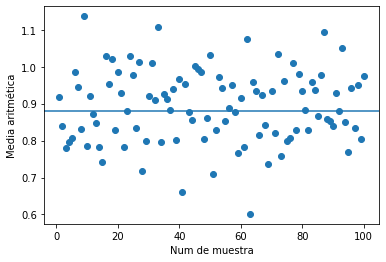

In [16]:
import matplotlib.pyplot as plt

num_observaciones = 50
num_muestras = 100
lista_mean=[]
for muestra in range(num_muestras):
    s=londres['energy_max'].sample(num_observaciones,random_state = muestra)
    lista_mean.append(s.mean())
    
plt.scatter(range(1,101),lista_mean)
plt.axhline(londres['energy_max'].mean())
plt.xlabel('Num de muestra')
plt.ylabel('Media aritmética')
plt.show()

¿Cómo podemos disminuir o solucionar esto? 

Una manera es, como se ha dicho, intentar acercarnos el máximo a toda la población. Veamos en nuestro ejemplo:

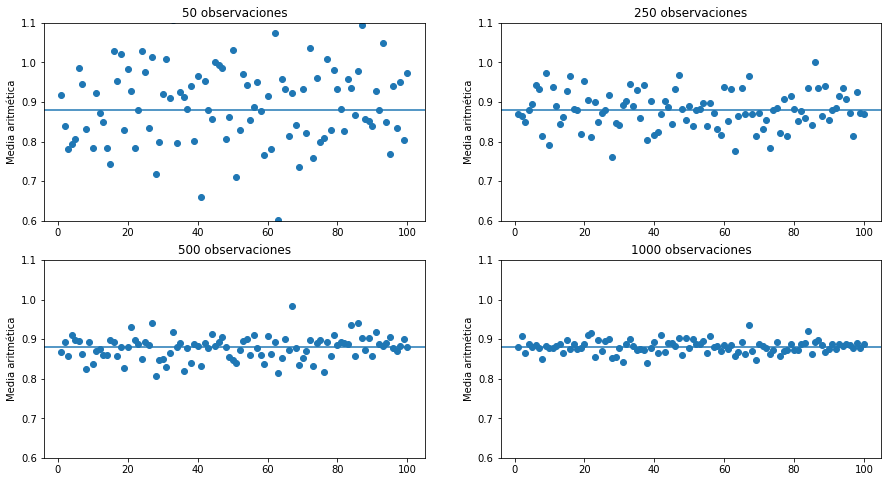

In [18]:
num_observaciones = 50
num_muestras = 100
listas_mean=[]
for num_observaciones in [50,250,500,1000]:
    lista_mean=[]
    for muestra in range(num_muestras):
        s=londres['energy_max'].sample(num_observaciones,random_state = muestra)
        lista_mean.append(s.mean())
    listas_mean.append(lista_mean)
    
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.scatter(range(1,101),listas_mean[0])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('50 observaciones')

plt.subplot(2,2,2)
plt.scatter(range(1,101),listas_mean[1])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('250 observaciones')

plt.subplot(2,2,3)
plt.scatter(range(1,101),listas_mean[2])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('500 observaciones')

plt.subplot(2,2,4)
plt.scatter(range(1,101),listas_mean[3])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('1000 observaciones')

plt.show()

También debemos asegurar que la muestra sea representativa de las diferentes posbles categorias que haya en nuestro dataset. Para eso se puede usar *stratified sampling* o muestreo estratigicado. 

En el muestreo estratificado, se dividen a los sujetos en subgrupos denominados estratos en función de las características que comparten (por ejemplo, raza, sexo, nivel de estudios). Una vez divididos, cada subgrupo se muestrea aleatoriamente utilizando otro método de muestreo probabilístico.


<img src="Figures/stratified_sampling.jpg" alt="Drawing" style="width: 450px;"/>

## 2. Limpieza y resumen de datos

Pandas nos ofrece varias opciones para obtener un resumen de los datos como el método *describe* visto anteriormente. Además, podemos usar otros métodos como:

<img src="Figures/pandas_summary.png" alt="Drawing" style="width: 450px;"/>

También son interesantes los métodos *value_counts* i *nunique*

In [19]:
londres_raw = pd.read_csv('Data/block_13_diario_raw.csv')

londres_raw['energy_min'].max()

1.068

In [20]:
# Ejercicio
# Calcular la std de la energía mediana del contador MAC000113. R= 0.180486
londres_raw[londres_raw['LCLid']=='MAC000113']['energy_median'].std()

0.18086813427485007

Como ya se ha visto, hay varias opciones para tratar con valores vacíos, pero pandas nos ofrece algunas opciones rápidas e interesantes para ir rápido

<img src="Figures/missing.png" alt="Drawing" style="width: 450px;"/>

**Análisis Exploratorio de Datos - Ejemplo**

Primero, identificamos los tipos de valores que hay en cada columna. Esto es necesario ya que, como veremos más adelante, columnas numéricas y no numéricas se tratan usando métodos distintos.

In [21]:
londres_raw.dtypes

LCLid             object
day               object
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count     float64
energy_std       float64
energy_sum       float64
energy_min       float64
dtype: object

Para ver si hay valores nulos, se puede usar el método .isna(), que devuelve convierte cada casilla en True (si es un NaN) o False (si no lo es), junto con el método .sum() para obtener el número total de NaNs por columna.

In [23]:
londres_raw.isna().sum()

LCLid              1
day                0
energy_median     11
energy_mean        7
energy_max         2
energy_count       2
energy_std       127
energy_sum         3
energy_min         3
dtype: int64

### Ejemplos
Vamos a tratar los NA de las distintas columnas con métodos diferentes:
* LCLid, energy_std: Copiaremos el valor de arriba.
* energy_median, energy_mean: Copiar el valor de abajo
* energy_count: Fijaremos el valor "48".
* energy_sum: Interpolación con method='linear'.
* energy_max: Mean de energy_max.
* energy_min: Mediana de energy_min.

In [32]:
# Ejemplo: LCLid
londres_raw['LCLid'].fillna(method='ffill', inplace=True)
# Ejercicio: energy_std
londres_raw['energy_std'].fillna(method='ffill', inplace=True)

# Ejemplo: energy_count
londres_raw['energy_count'].fillna(48, inplace=True)



# Ejemplo: energy_median
londres_raw['energy_median'].fillna(method='bfill', inplace=True)
# Ejercicio: energy_mean
londres_raw['energy_mean'].fillna(method='bfill', inplace=True)


# Ejemplo: energy_sum
londres_raw['energy_sum'].interpolate(method='linear', inplace=True)


# Ejemplo: energy_max
londres_raw['energy_max'].fillna(londres['energy_max'].mean(), inplace=True)
# Ejercicio: energy_min
londres_raw['energy_min'].fillna(londres['energy_min'].median(), inplace=True)

londres_raw.isna().sum()

LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64

## 3. Estadística descriptiva

### Media, mediana y moda

#### Media

Podemos pensar que la media es el centro de gravedad de los datos de una distribución. Veamos un ejemplo y discutamos qué información se puede obtener y como nos puede ayudar o, al revés, desinformar si no se va con cuidado.

In [33]:
import random
import numpy as np

poblacion = [0,2,3,3,3,4,13]
muestra = random.choices(poblacion, k=4) #Seleccionar aleatoriamente 4 valores de la población

poblacion_media = np.mean(poblacion)
muestra_media = np.mean(muestra)

print('Media poblacion:', poblacion_media)
print('Media muestra:', muestra_media)
print(muestra)

Media poblacion: 4.0
Media muestra: 3.25
[3, 3, 3, 4]


#### Media Ponderada y Mediana

Observemos el dataset *netherlands*

In [34]:
netherlands = pd.read_csv('Data/Electricity_Netherlands/coteq_electricity_2019.csv')
netherlands.dropna()
netherlands.head(3)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4037,89.47,0.0
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100.00,97.50,80,1x35,2642,95.00,0.0
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1313,100.00,0.0


Si se quiere obtener la media del consumo de todo el dataset, se podría calcular como:

In [35]:
netherlands[['annual_consume']].mean()

annual_consume    3971.755365
dtype: float64

Pero si observamos bien el *dataset* podemos ver que esta media no es justa. ¿Por qué?

In [36]:
def weighted(values, weights):
    return sum([a*b for a,b in zip(values, weights)])/sum(weights)

weighted(netherlands['annual_consume'], netherlands['num_connections'])

3981.6492243827834

Hemos visto como hay veces que computar la media, auque se pueda hacer, no sería correcto. En otras ocasiones, lo que nos pasará es que directamente no podemos calcular la media. Por ejemplo

In [37]:
Edad_clientes = [34,23,54,23,'más de 80',76,34,43,65,57,'más de 80',43,39,49]

En este caso, la **mediana** puede ser una buena medida alternativa.

Otra ventaja de la mediana es que no considera de manera equitativa todos los elementos de la distribución, lo que la hace más resistente a cambios en la distribución.

#### Moda

Hemos visto que en ocasiones la media no nos dará la información buscada, o simplemente no se podrá calcular y usaremos la mediana. En otras ocasiones, pero, la moda también nos puede ser de utilidad. Por ejemplo:

In [38]:
netherlands['city'].head(5)

0    ENTER
1     GOOR
2     GOOR
3     GOOR
4     GOOR
Name: city, dtype: object

In [39]:
netherlands['city'].value_counts()

ALMELO       1577
OLDENZAAL     714
GOOR          271
ENTER           1
Name: city, dtype: int64

### Variabilidad

Veamos dos distribuciones:

In [40]:
import numpy as np

A=[4,4,4,4]
B=[0,8,0,8]

print('La media de A es:',np.mean(A))
print('La media de B es:',np.mean(B))

La media de A es: 4.0
La media de B es: 4.0


Efectivamente, dos distribuciones muy distintas pueden tener la misma media.

Qué otro parámetro nos puede aydar a distinguir las dos distribuciones? Por ejemplo el rango:

In [41]:
rango_A=max(A)-min(A)
rango_B=max(B)-min(B)

print('El rango de A es:',rango_A)
print('El rango de B es:',rango_B)

El rango de A es: 0
El rango de B es: 8


Pero el rango solo considera dos valores, y no es una buena solución:

In [42]:
C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21]

rango_C=max(C)-min(C)
print('La media de C es:',np.mean(C))
print('El rango de C es:',rango_C)

La media de C es: 2.176470588235294
El rango de C es: 20


Vemos que tenemos una distribución con muy poca variabilidad, pero con un rango muy alto. Esto es debido a que solo considera dos valores de la distribución y no toda la distribución.

Si consideramos todos los valores podemos calcular:

<img src="Figures/variabilities.svg" alt="Drawing" style="width: 450px;"/>


$$ Distancia Media = \frac{1}{n} \sum_i (x_i - \mu) $$


Para evitarlo, usaremos:

$$ Varianza = \frac{1}{n} \sum_i (x_i - \mu)^2 $$
o también: $$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

El problema de la varianza es que no da un valor que no nos ofrece ningún sentido.

In [43]:
consumos_semana=[0,7,8]

print('La varianza es de:', np.var(consumos_semana))

La varianza es de: 12.666666666666666


Para esto se usa la **desviacón estándar**

Desviación estándar $$ \sigma = \sqrt (\frac{1}{n} \sum_i (x_i - \mu)^2) $$


In [44]:
consumos=[0,7,8]

print('La desviación estandar es de:', np.std(consumos_semana))
print('La media es de:', np.mean(consumos_semana))

La desviación estandar es de: 3.559026084010437
La media es de: 5.0


#### Ejercicio

Obtener la Varianza, Desviación y Media para las tres distribuciones superiores. ¿Qué valores se obtienen?

In [ ]:
# Resolver aquí

La desviación estandard es: 0.6724071988516169


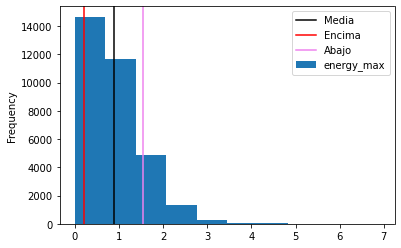

In [45]:
media = londres['energy_max'].mean()
st_dev = londres['energy_max'].std()
londres['energy_max'].plot.hist()
plt.axvline(media, color = 'Black', label = 'Media')
plt.axvline(media - st_dev, color = 'Red', label = 'Encima')
plt.axvline(media + st_dev, color = 'Violet', label = 'Abajo')
plt.legend()
print("La desviación estandard es:", st_dev)

¿Qué ocurre cuando no podemos trabajar con los datos de toda una población y solo tenemos una muestra?

Véamos qué pasa si cogemos varias muestras al azar de nuestra distribución de energía máxima:

La desviación estandard es: 0.1540374600067817


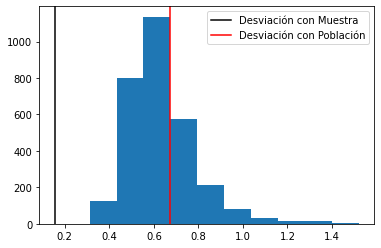

In [46]:
from math import sqrt
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

std_lista=[]

for i in range(3000):
    sd=standard_deviation(londres['energy_max'].sample(20, random_state=i))
    std_lista.append(sd)

plt.hist(std_lista)
std_lista = np.array(std_lista)
plt.axvline(std_lista.std(), color='Black', label='Desviación con Muestra')
plt.axvline(st_dev, color = 'Red', label = 'Desviación con Población')
plt.legend()
print("La desviación estandard es:", std_lista.std())

Se puede ver como, en general, las desviaciones estándar siempre son inferiores a la real.

<img src="Figures/bessel1.svg" alt="Drawing" style="width: 600px;"/>

Conseguir muestras que tengas una varianza parecida es muy difícil.

<img src="Figures/bessel2.svg" alt="Drawing" style="width: 300px;"/>




### Tablas de frecuencia

Una tabla de frecuencia nos permite saber cuántas veces aparece cada categoria en una variable. Por suerte Pandas ya nos ofrece herramientas para obtenerla rápidamente:

In [47]:
frec_counts = londres['LCLid'].value_counts()
frec_counts.head()

MAC000113    808
MAC005269    750
MAC005270    750
MAC005319    744
MAC005317    744
Name: LCLid, dtype: int64

¿En el caso de trabajar con una variable más continua qué pasaría?

In [48]:
frec_counts = londres['energy_max'].value_counts()
frec_counts

0.047    171
0.046    148
0.024    137
0.000    127
0.045     87
        ... 
3.142      1
4.476      1
2.701      1
2.890      1
2.064      1
Name: energy_max, Length: 2987, dtype: int64

De repente, esta tabla no tiene mucho sentido ni mucha utilidad. Para esto podemos usar el código siguiente:

In [49]:
frec_counts = londres['energy_max'].value_counts(bins=5)
frec_counts

(-0.0079, 1.379]    26371
(1.379, 2.759]       6190
(2.759, 4.138]        372
(4.138, 5.518]         43
(5.518, 6.897]         16
Name: energy_max, dtype: int64

Para visualizar las tablas de frecuencia podemos usar Matplotlib como antes, o hacer los gráficos directamente desde pandas, que ya nos da esta posibilidad facilitando el trabajo.

Así, en el primer caso, tendríamos:

<AxesSubplot:>

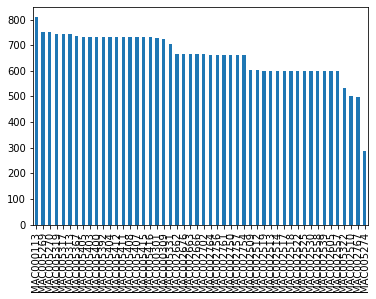

In [50]:
londres['LCLid'].value_counts().plot.bar()

Y en el segundo caso:

<AxesSubplot:>

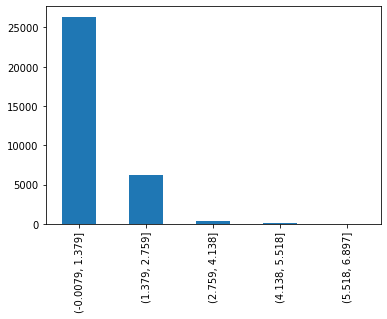

In [54]:
londres['energy_max'].value_counts(bins=5).plot.bar()

### Comparar distribuciones de frecuencia

La mejor manera de comparar y evaluar distintas distribuciones de frecuencia es visualizarlas. A continuación hay varios ejemplos:


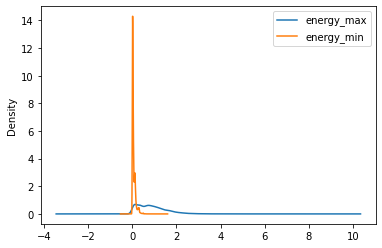

In [55]:
import warnings
warnings.filterwarnings('ignore')

londres['energy_max'].plot.kde()
londres['energy_min'].plot.kde()
plt.legend()

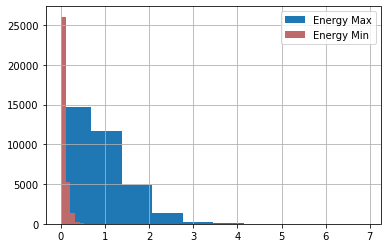

In [56]:
import seaborn as sns

londres['energy_max'].hist(histtype='stepfilled', label='Energy Max')
londres['energy_min'].hist(histtype='stepfilled', color=sns.desaturate("indianred", .75), label='Energy Min')
plt.legend()

#### Ejercicio

Hacer dos boxplots comparando la energia màxima entre dos contadores con LCLid distintos del dataset *londres* cargado.

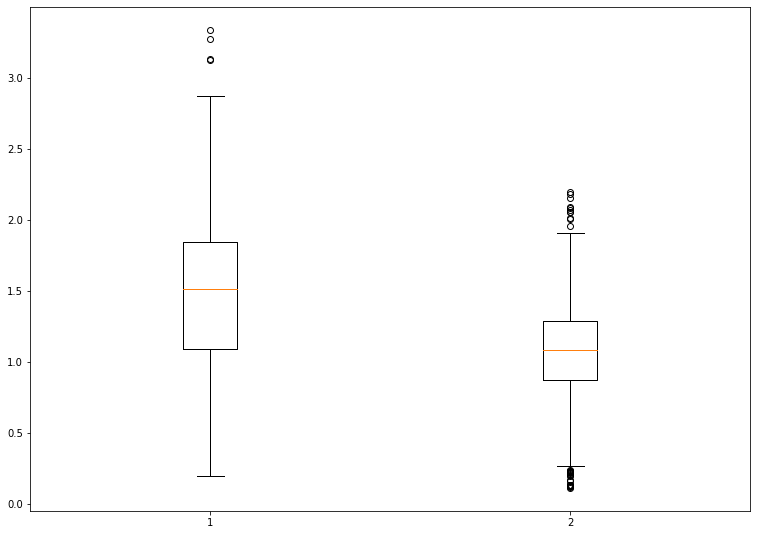

In [57]:
# Vuestro Codigo!

# Vuestro Codigo!
MAC113 = londres.loc[londres['LCLid']=='MAC000113', 'energy_max']
MAC5270 = londres.loc[londres['LCLid']=='MAC005270', 'energy_max']
data = [MAC113, MAC5270]

fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
# show plot
plt.show()

**Ejercicio**

Inspeccionar la carpeta Data de este repositorio y abrir el archivo con los consumos de electricidad de la zona west-land infra en 2019 en un dataset llamado *netherlands* e inspeccionar las primeras filas



In [58]:
import pandas as pd
import numpy as np

netherlands.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4037,89.47,0.0
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100.00,97.50,80,1x35,2642,95.00,0.0
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1313,100.00,0.0
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,92.68,85.37,54,3x25,6405,92.68,0.0
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36,3x25,4742,100.00,0.0


**Ejercicios** 

+ ¿Hay missing values? ¿Dónde?
+ ¿Cuántos tipos de conexión hay?
+ ¿Cuántos pueblos hay en total?
+ ¿Qué pueblo tiene más número de conexiones?
+ ¿En cuántos casos el zipcode_from es igual al zipcode_to?

In [72]:
#Respuesta:

netherlands.isna().sum()

netherlands['type_of_connection'].value_counts()

netherlands['city'].nunique()

netherlands.groupby('city')['num_connections'].sum()

netherlands[netherlands['zipcode_from']==netherlands['zipcode_to']]

(2107, 14)

### Asimetría

En una distribución, también podremos medir la asimetría o el *skewness*:

$$ g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 }$$

Otra fórmula que da buenos resultados es *Pearson's median skewness coefficient*:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

El skewess muestra:
+ Si es negativo es que se extiende más a la izquierda que a la derecha.
+ Si es positivo es que se extiende más a la derecha que a la izquierda.

En Pandas:

In [ ]:
londres['energy_max'].plot.kde()
londres['energy_max'].skew()